Ventas de Video Juegos

Tabla obtenida de Kaggle
Dataset contiene un listado de videojuegos con ventas mayores a 100,000 copias. Generado de un webscrap de vgchartz.com
https://www.kaggle.com/datasets/gregorut/videogamesales

Datos actualizados al 2016.

Analisis desde el punto de vista de empleado de PlayStation y ver donde se deben enfocar los próximos videojuegos y en que géneros

In [6]:
#Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import requests
import seaborn as sns

In [7]:
#Assign csv file containing vg dataset to the variable df (previously uploaded to personal Google Drive) and check the information format
df = pd.read_csv('G:/My Drive/Dev F/Proyecto/vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [8]:
#Check all the DataFrame information, shape: 11 columns, 16,598 rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [9]:
#As an analyst for Playstation in this project I will be analyzing only Sony Playstation Sales but dropping PS1 as it was released over 20 years ago
ps_df = df[(df['Platform'] == 'PS4') | (df['Platform'] == 'PS3') | (df['Platform'] == 'PS2')]
ps_df.sort_values('Global_Sales', ascending= False).head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
17,18,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
24,25,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
28,29,Gran Turismo 3: A-Spec,PS2,2001.0,Racing,Sony Computer Entertainment,6.85,5.09,1.87,1.16,14.98
33,34,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,5.77,5.81,0.35,2.31,14.24


In [10]:
#Initial exploratory analysis. 5022 rows (some missing values). Year has a float format. 
ps_df.info()
ps_df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 3826 entries, 16 to 16595
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          3826 non-null   int64  
 1   Name          3826 non-null   object 
 2   Platform      3826 non-null   object 
 3   Year          3767 non-null   float64
 4   Genre         3826 non-null   object 
 5   Publisher     3821 non-null   object 
 6   NA_Sales      3826 non-null   float64
 7   EU_Sales      3826 non-null   float64
 8   JP_Sales      3826 non-null   float64
 9   Other_Sales   3826 non-null   float64
 10  Global_Sales  3826 non-null   float64
dtypes: float64(6), int64(1), object(4)
memory usage: 358.7+ KB


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,3826.000000,3767.000000,3826.000000,3826.000000,3826.000000,3826.000000,3826.000000
mean,7252.829587,2007.672153,0.280423,0.210847,0.061027,0.098988,0.651223
std,4775.969799,4.412004,0.580588,0.509438,0.169473,0.302644,1.288836
min,17.000000,2000.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,3122.250000,2004.000000,0.010000,0.000000,0.000000,0.010000,0.090000
50%,6698.000000,2007.000000,0.100000,0.060000,0.000000,0.030000,0.250000
75%,11169.500000,2011.000000,0.280000,0.190000,0.050000,0.090000,0.650000
max,16598.000000,2017.000000,9.430000,9.270000,3.610000,10.570000,21.400000


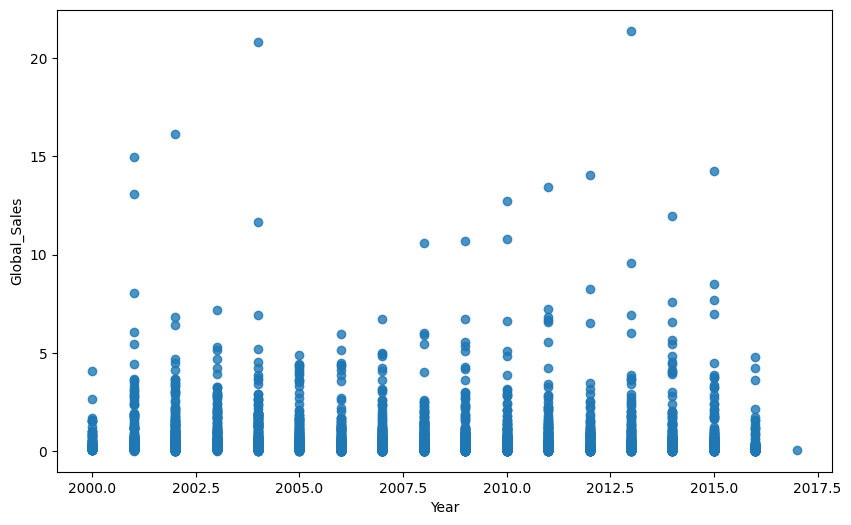

In [11]:
#Double check visually
plt.figure(figsize= (10, 6))
sns.regplot(data= ps_df, y= "Global_Sales", x= "Year", fit_reg= False)
plt.show()

In [12]:
#Function to search an API on https://rawg.io/ to find the missing release year of the games.

# Replace 'RAWG_API_KEY'
RAWG_API_KEY = '284f997010e446a6a4782c2f1e11f196'

# List of game names
games = [
    'Madden NFL 2004', 'FIFA Soccer 2004', 'wwe Smackdown vs. Raw 2006', 'Rock Band',
    'Triple Play 99', 'NASCAR Thunder 2003', 'Rock Band', 'Legacy of Kain: Soul Reaver',
    'Suikoden III', 'Yakuza 4', 'LEGO Harry Potter: Years 5-7', 'Wheel of Fortune',
    'The Lord of the Rings: War in the North', 'MLB SlugFest 20-03', 'Test Drive Unlimited 2',
    'Monster Hunter 2', 'NASCAR: Dirt to Daytona', 'Sonic the Hedgehog', 'NFL GameDay 2003',
    'Silent Hill: Homecoming', 'Harvest Moon: Save the Homeland', 'Robert Ludlum\'s The Bourne Conspiracy',
    'Final Fantasy XI', 'All-Star Baseball 2005', 'The Dukes of Hazzard II: Daisy Dukes It Out',
    'Haven: Call of the King', 'Rock Revolution', 'Jonah Lomu Rugby Challenge', 'College Hoops 2K6',
    'Mega Man X Collection', 'Singularity', 'Jet X20', 'Tribes: Aerial Assault', 'Move Fitness',
    'Yu Yu Hakusho: Dark Tournament', 'WRC: FIA World Rally Championship', 'Twisted Metal: Small Brawl',
    'NBA Starting Five', 'Backbreaker', 'James Cameron\'s Dark Angel', 'Sword of the Samurai',
    'Splatterhouse', 'Alone in the Dark: The New Nightmare', 'eJay Clubworld', 'Bejeweled 3',
    'Record of Agarest War Zero', 'Saru! Get You! Million Monkeys', 'Star Trek: Conquest', 'Happy Feet Two',
    'Demon Chaos', 'Action Man-Operation Extreme', 'McFarlane\'s Evil Prophecy', 'Port Royale 3',
    'Combat Elite: WWII Paratroopers', 'Mountain Bike Adrenaline', 'Battle vs. Chess',
    'The History Channel: Great Battles - Medieval', 'Monster Hunter Frontier Online', 'B.L.U.E.: Legend of Water',
    'Sega Rally 2006', 'Samurai Spirits: Tenkaichi Kenkakuden', 'Umineko no Naku Koro ni San: Shinjitsu to Gensou no Yasoukyoku',
    'Cabela\'s Alaskan Adventure', 'Virtua Quest', 'Agarest Senki: Re-appearance', 'Hakuouki: Shinsengumi Kitan'
]

def get_game_release_year(game_name):
    url = f'https://api.rawg.io/api/games?search={game_name}&key={RAWG_API_KEY}'
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()
        if 'results' in data and data['results']:
            release_year = data['results'][0].get('released')
            if release_year:
                return release_year[:4]
            else:
                print(f"Release year not found for {game_name}.")
        else:
            print(f"Data not found for {game_name}.")
    else:
        print(f"Error fetching data for {game_name}. Status code: {response.status_code}")
        print("Response text:", response.text)

    return None

# Create an empty dictionary to store the game names and release years
games_release_years = {}

# Get release years for each game and save them in the dictionary
for game in games:
    release_year = get_game_release_year(game)
    games_release_years[game] = release_year

Release year not found for McFarlane's Evil Prophecy.
Release year not found for Combat Elite: WWII Paratroopers.


In [13]:
#Two games were not found on the API: McFarlane's Evil Prophecy (2004) and Combat Elite: WWII Paratroopers (2005), these were changed manually

#games_release_years['McFarlane's Evil Prophecy']
                    
games_release_years.update({"McFarlane\'s Evil Prophecy": "2004","Combat Elite: WWII Paratroopers": "2005",})
print(games_release_years['McFarlane\'s Evil Prophecy'])
print(games_release_years['Combat Elite: WWII Paratroopers'])

2004
2005


In [14]:
#Fill empty values of year with the dictionary games_release_years previously filled and replace Publisher values with "Unknown"
#Found game with the wrong Genre classification FIFA Soccer 13 --> Action  --> Sports 
ps_df['Year'] = ps_df['Year'].fillna(ps_df['Name'].map(games_release_years))
ps_df['Publisher'] = ps_df['Publisher'].fillna('Unknown')
ps_df.isnull().sum()

ps_df.loc[ps_df["Name"] == "FIFA Soccer 13", "Genre"] = "Sports"

C:\Users\gregl\AppData\Local\Temp\ipykernel_23716\785745288.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ps_df['Year'] = ps_df['Year'].fillna(ps_df['Name'].map(games_release_years))
C:\Users\gregl\AppData\Local\Temp\ipykernel_23716\785745288.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ps_df['Publisher'] = ps_df['Publisher'].fillna('Unknown')


In [15]:
#Check again all DataFrame's info
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3826 entries, 16 to 16595
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          3826 non-null   int64  
 1   Name          3826 non-null   object 
 2   Platform      3826 non-null   object 
 3   Year          3826 non-null   object 
 4   Genre         3826 non-null   object 
 5   Publisher     3826 non-null   object 
 6   NA_Sales      3826 non-null   float64
 7   EU_Sales      3826 non-null   float64
 8   JP_Sales      3826 non-null   float64
 9   Other_Sales   3826 non-null   float64
 10  Global_Sales  3826 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 358.7+ KB


In [16]:
ps_df = ps_df.astype({'Year': 'int'})
ps_df['Year']

16       2013
17       2004
24       2002
28       2001
33       2015
         ... 
16561    2008
16570    2016
16572    2008
16580    2008
16595    2008
Name: Year, Length: 3826, dtype: int32

In [17]:
#Check again all DataFrame's info, changed Year to integer
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3826 entries, 16 to 16595
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          3826 non-null   int64  
 1   Name          3826 non-null   object 
 2   Platform      3826 non-null   object 
 3   Year          3826 non-null   int32  
 4   Genre         3826 non-null   object 
 5   Publisher     3826 non-null   object 
 6   NA_Sales      3826 non-null   float64
 7   EU_Sales      3826 non-null   float64
 8   JP_Sales      3826 non-null   float64
 9   Other_Sales   3826 non-null   float64
 10  Global_Sales  3826 non-null   float64
dtypes: float64(5), int32(1), int64(1), object(4)
memory usage: 343.7+ KB


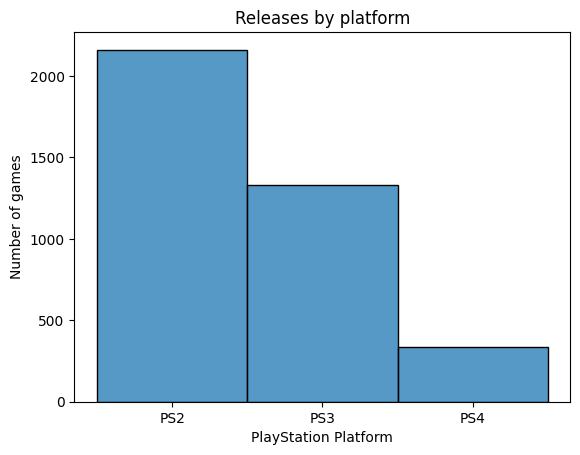

In [18]:
#Start exploratory graphs

sns.histplot(x=ps_df['Platform'].sort_values())

plt.title("Releases by platform")
plt.xlabel("PlayStation Platform")
plt.ylabel("Number of games")

plt.show()

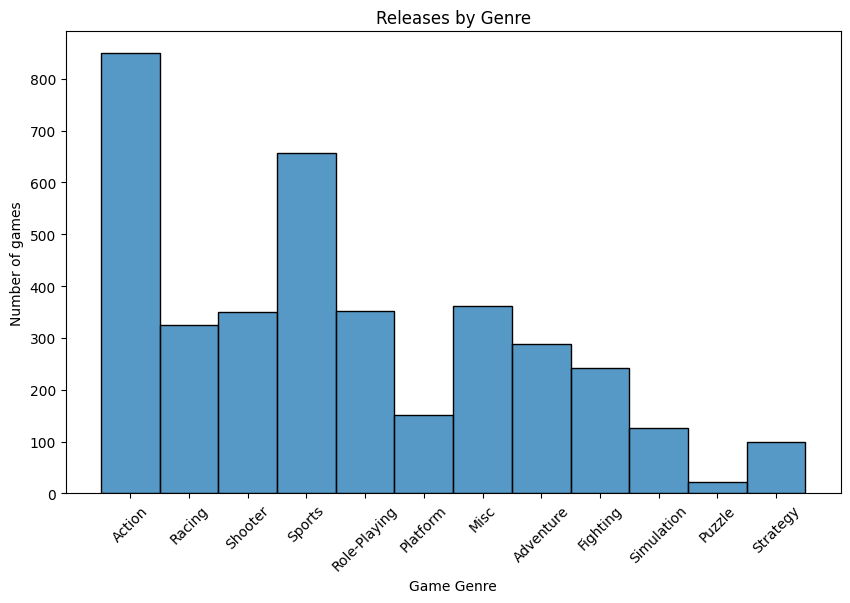

In [19]:
plt.figure(figsize= (10,6))
sns.histplot(x=ps_df['Genre'])


plt.title("Releases by Genre")
plt.xlabel("Game Genre")
plt.ylabel("Number of games")
plt.xticks(rotation=45)

plt.show()

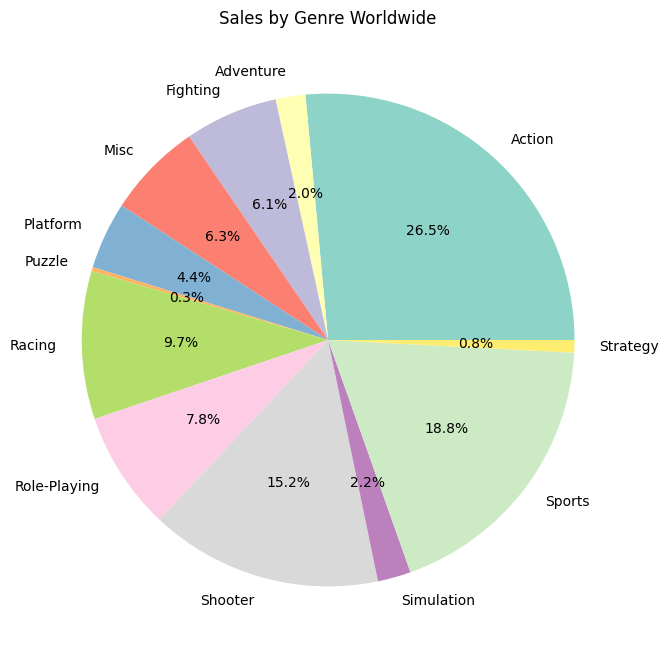

In [20]:
#Group the DataFrame by genre to see which genre is leading sales
sales_per_genre_ww = ps_df.groupby('Genre')['Global_Sales'].sum().reset_index()

custom_palette = sns.color_palette('Set3')

plt.figure(figsize= (10, 8))
plt.pie(sales_per_genre_ww['Global_Sales'], labels= sales_per_genre_ww['Genre'], autopct= '%1.1f%%', colors= custom_palette)

plt.title("Sales by Genre Worldwide")
plt.show()

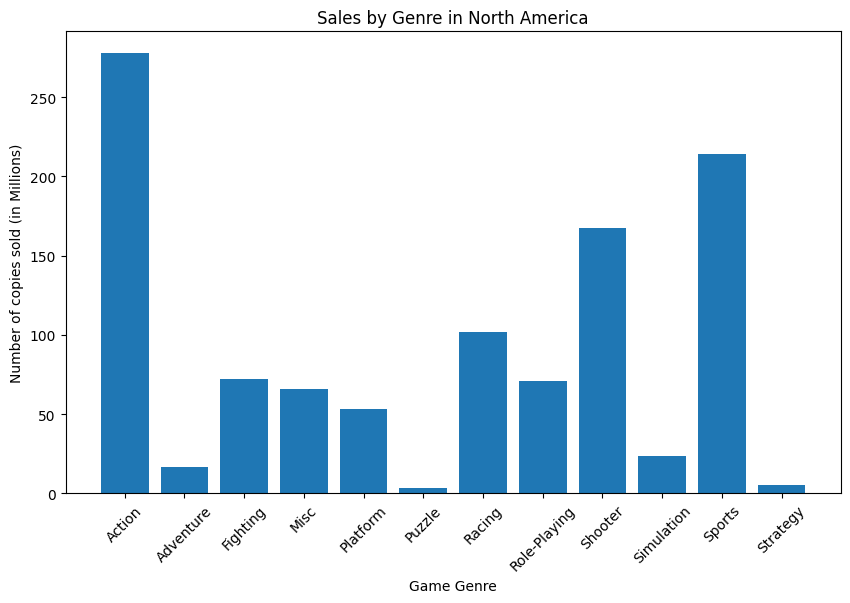

In [21]:
#Group the DataFrame by genre to see which genre is leading sales
sales_per_genre_na = ps_df.groupby('Genre')['NA_Sales'].sum().reset_index()

plt.figure(figsize= (10,6))
plt.bar(sales_per_genre_na['Genre'], sales_per_genre_na['NA_Sales'])

plt.title("Sales by Genre in North America")
plt.xlabel("Game Genre")
plt.ylabel("Number of copies sold (in Millions)")
plt.xticks(rotation=45)

plt.show()

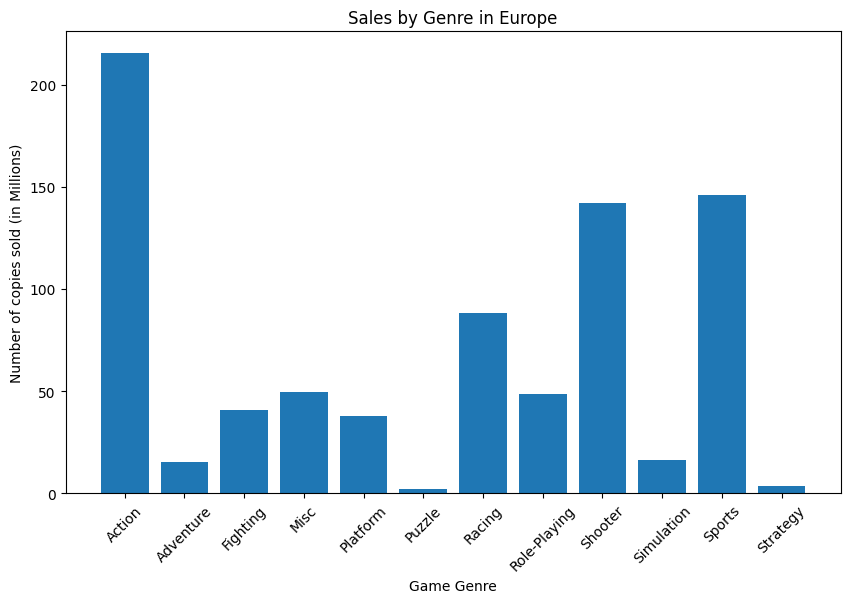

In [22]:
#Group the DataFrame by genre to see which genre is leading sales
sales_per_genre_eu = ps_df.groupby('Genre')['EU_Sales'].sum().reset_index()

plt.figure(figsize= (10,6))
plt.bar(sales_per_genre_eu['Genre'], sales_per_genre_eu['EU_Sales'])

plt.title("Sales by Genre in Europe")
plt.xlabel("Game Genre")
plt.ylabel("Number of copies sold (in Millions)")
plt.xticks(rotation=45)

plt.show()

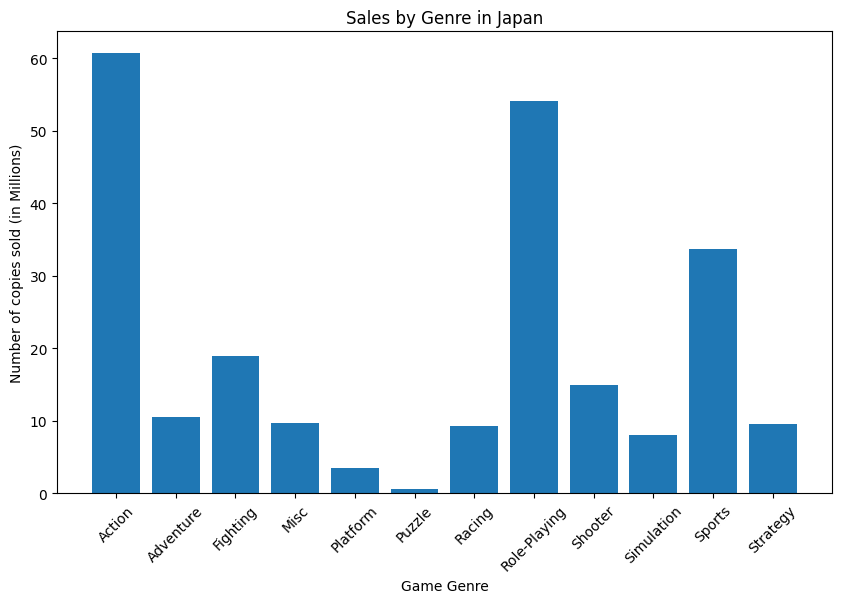

In [23]:
#Group the DataFrame by genre to see which genre is leading sales
sales_per_genre_jp = ps_df.groupby('Genre')['JP_Sales'].sum().reset_index()

plt.figure(figsize= (10,6))
plt.bar(sales_per_genre_jp['Genre'], sales_per_genre_jp['JP_Sales'])

plt.title("Sales by Genre in Japan")
plt.xlabel("Game Genre")
plt.ylabel("Number of copies sold (in Millions)")
plt.xticks(rotation=45)

plt.show()

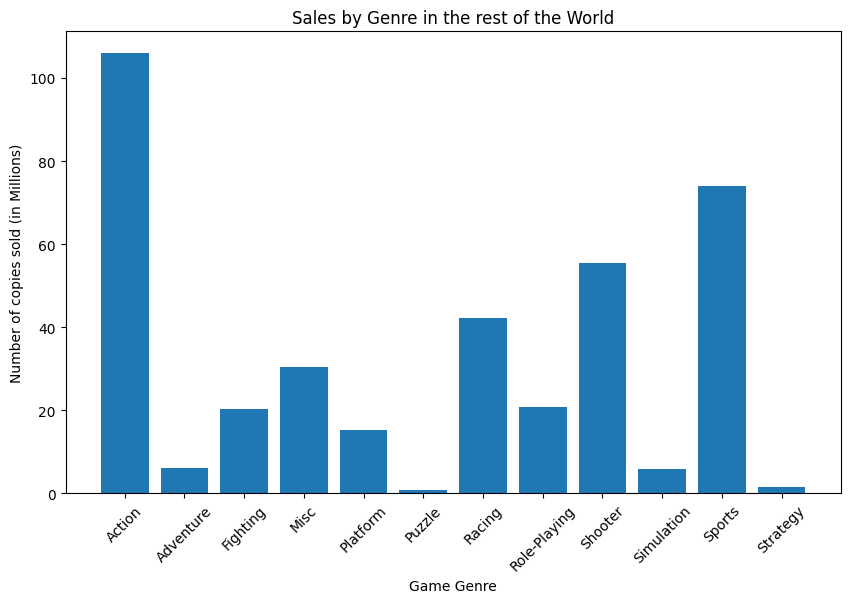

In [24]:
#Group the DataFrame by genre to see which genre is leading sales
sales_per_genre_other = ps_df.groupby('Genre')['Other_Sales'].sum().reset_index()

plt.figure(figsize= (10,6))
plt.bar(sales_per_genre_other['Genre'], sales_per_genre_other['Other_Sales'])

plt.title("Sales by Genre in the rest of the World")
plt.xlabel("Game Genre")
plt.ylabel("Number of copies sold (in Millions)")
plt.xticks(rotation=45)

plt.show()

In [25]:
#Survey the best selling games on the top categories
ps_df[ps_df['Genre'] == "Action"].sort_values('Global_Sales', ascending= False).head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16,17,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
17,18,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
24,25,Grand Theft Auto: Vice City,PS2,2002,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
38,39,Grand Theft Auto III,PS2,2001,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10
44,45,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.98
56,57,Grand Theft Auto IV,PS3,2008,Action,Take-Two Interactive,4.76,3.76,0.44,1.62,10.57
115,116,Uncharted 3: Drake's Deception,PS3,2011,Action,Sony Computer Entertainment,2.77,2.80,0.19,1.06,6.83
119,120,Uncharted 2: Among Thieves,PS3,2009,Action,Sony Computer Entertainment,3.27,2.25,0.21,1.00,6.73
123,124,Red Dead Redemption,PS3,2010,Action,Take-Two Interactive,2.79,2.61,0.17,1.03,6.60
128,129,Assassin's Creed III,PS3,2012,Action,Ubisoft,2.64,2.56,0.16,1.14,6.50


In [26]:
ps_df[ps_df['Genre'] == "Sports"].sort_values('Global_Sales', ascending= False).head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
77,78,FIFA 16,PS4,2015,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
82,83,FIFA Soccer 13,PS3,2012,Sports,Electronic Arts,1.06,5.05,0.13,2.01,8.24
112,113,FIFA 14,PS3,2013,Sports,Electronic Arts,0.78,4.32,0.07,1.73,6.90
121,122,FIFA 12,PS3,2011,Sports,Electronic Arts,0.84,4.32,0.11,1.42,6.69
124,125,FIFA 15,PS4,2014,Sports,Electronic Arts,0.79,4.29,0.05,1.47,6.59


In [27]:
ps_df[ps_df['Genre'] == "Shooter"].sort_values('Global_Sales', ascending= False).head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
33,34,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
34,35,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4.99,5.88,0.65,2.52,14.03
37,38,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,Activision,5.54,5.82,0.49,1.62,13.46
40,41,Call of Duty: Black Ops,PS3,2010,Shooter,Activision,5.98,4.44,0.48,1.83,12.73
55,56,Call of Duty: Modern Warfare 2,PS3,2009,Shooter,Activision,4.99,3.69,0.38,1.63,10.69


In [28]:
ps_df[ps_df['Genre'] == "Racing"].sort_values('Global_Sales', ascending= False).head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
28,29,Gran Turismo 3: A-Spec,PS2,2001,Racing,Sony Computer Entertainment,6.85,5.09,1.87,1.16,14.98
47,48,Gran Turismo 4,PS2,2004,Racing,Sony Computer Entertainment,3.01,0.01,1.10,7.53,11.66
54,55,Gran Turismo 5,PS3,2010,Racing,Sony Computer Entertainment,2.96,4.88,0.81,2.12,10.77
104,105,Need for Speed Underground,PS2,2003,Racing,Electronic Arts,3.27,2.83,0.08,1.02,7.20
113,114,Need for Speed Underground 2,PS2,2004,Racing,Electronic Arts,2.71,3.02,0.08,1.09,6.90


In [29]:
ps_df[ps_df['Genre'] == "Role-Playing"].sort_values('Global_Sales', ascending= False).head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
86,87,Final Fantasy X,PS2,2001,Role-Playing,Sony Computer Entertainment,2.91,2.07,2.73,0.33,8.05
109,110,Fallout 4,PS4,2015,Role-Playing,Bethesda Softworks,2.47,3.15,0.24,1.10,6.96
126,127,The Elder Scrolls V: Skyrim,PS3,2011,Role-Playing,Bethesda Softworks,2.55,2.71,0.25,1.05,6.56
131,132,Kingdom Hearts,PS2,2002,Role-Playing,Sony Computer Entertainment,3.64,1.20,1.49,0.07,6.40
147,148,Final Fantasy XII,PS2,2006,Role-Playing,Square Enix,1.88,0.00,2.33,1.74,5.95


In [30]:
sales_per_publisher = ps_df.groupby("Publisher")["Global_Sales"].sum().reset_index()

sales_per_publisher.sort_values("Global_Sales", ascending= False).head(10)

,Publisher,Global_Sales
63,Electronic Arts,479.82
183,Sony Computer Entertainment,349.49
11,Activision,252.24
203,Take-Two Interactive,199.79
214,Ubisoft,136.43
119,Konami Digital Entertainment,122.52
200,THQ,102.60
143,Namco Bandai Games,101.37
39,Capcom,67.62
190,Square Enix,65.86


In [31]:
ps_df[ps_df["Publisher"] == "Sony Computer Entertainment"].sort_values("Global_Sales", ascending= False).head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
28,29,Gran Turismo 3: A-Spec,PS2,2001,Racing,Sony Computer Entertainment,6.85,5.09,1.87,1.16,14.98
47,48,Gran Turismo 4,PS2,2004,Racing,Sony Computer Entertainment,3.01,0.01,1.10,7.53,11.66
54,55,Gran Turismo 5,PS3,2010,Racing,Sony Computer Entertainment,2.96,4.88,0.81,2.12,10.77
86,87,Final Fantasy X,PS2,2001,Role-Playing,Sony Computer Entertainment,2.91,2.07,2.73,0.33,8.05
115,116,Uncharted 3: Drake's Deception,PS3,2011,Action,Sony Computer Entertainment,2.77,2.80,0.19,1.06,6.83
119,120,Uncharted 2: Among Thieves,PS3,2009,Action,Sony Computer Entertainment,3.27,2.25,0.21,1.00,6.73
131,132,Kingdom Hearts,PS2,2002,Role-Playing,Sony Computer Entertainment,3.64,1.20,1.49,0.07,6.40
148,149,LittleBigPlanet,PS3,2008,Platform,Sony Computer Entertainment,2.80,2.05,0.17,0.90,5.92
168,169,Minecraft,PS3,2014,Misc,Sony Computer Entertainment,1.97,2.51,0.00,0.94,5.42
210,211,Uncharted: Drake's Fortune,PS3,2007,Action,Sony Computer Entertainment,2.31,1.73,0.12,0.78,4.94


In [32]:
ps_df[ps_df["Name"].str.contains("Uncharted")].sort_values("Global_Sales", ascending= False).head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
115,116,Uncharted 3: Drake's Deception,PS3,2011,Action,Sony Computer Entertainment,2.77,2.80,0.19,1.06,6.83
119,120,Uncharted 2: Among Thieves,PS3,2009,Action,Sony Computer Entertainment,3.27,2.25,0.21,1.00,6.73
210,211,Uncharted: Drake's Fortune,PS3,2007,Action,Sony Computer Entertainment,2.31,1.73,0.12,0.78,4.94
243,244,Uncharted: The Nathan Drake Collection,PS4,2015,Action,Sony Computer Entertainment,1.96,1.69,0.08,0.74,4.47
271,272,Uncharted 4: A Thief's End,PS4,2016,Shooter,Sony Computer Entertainment,1.30,2.07,0.18,0.65,4.20


In [33]:
sales_per_year = ps_df[ps_df["Genre"] == "Racing"].groupby("Year").agg({
    "Genre": "first",
    "Global_Sales": "sum"
}).reset_index()

sales_per_year

,Year,Genre,Global_Sales
0,2000,Racing,7.69
1,2001,Racing,38.55
2,2002,Racing,22.13
3,2003,Racing,27.20
4,2004,Racing,32.78
5,2005,Racing,12.61
6,2006,Racing,13.25
7,2007,Racing,14.77
8,2008,Racing,14.23
9,2009,Racing,7.47


In [34]:
sales_gran_turismo = ps_df[ps_df["Name"].str.contains("Gran Turismo")]

sales_gran_turismo[["Name", "Year", "Global_Sales"]]

,Name,Year,Global_Sales
28,Gran Turismo 3: A-Spec,2001,14.98
47,Gran Turismo 4,2004,11.66
54,Gran Turismo 5,2010,10.77
272,Gran Turismo 5 Prologue,2007,4.20
344,Gran Turismo 6,2013,3.64
940,Gran Turismo Concept 2001 Tokyo,2001,1.84
1376,Gran Turismo 4 Prologue,2003,1.41


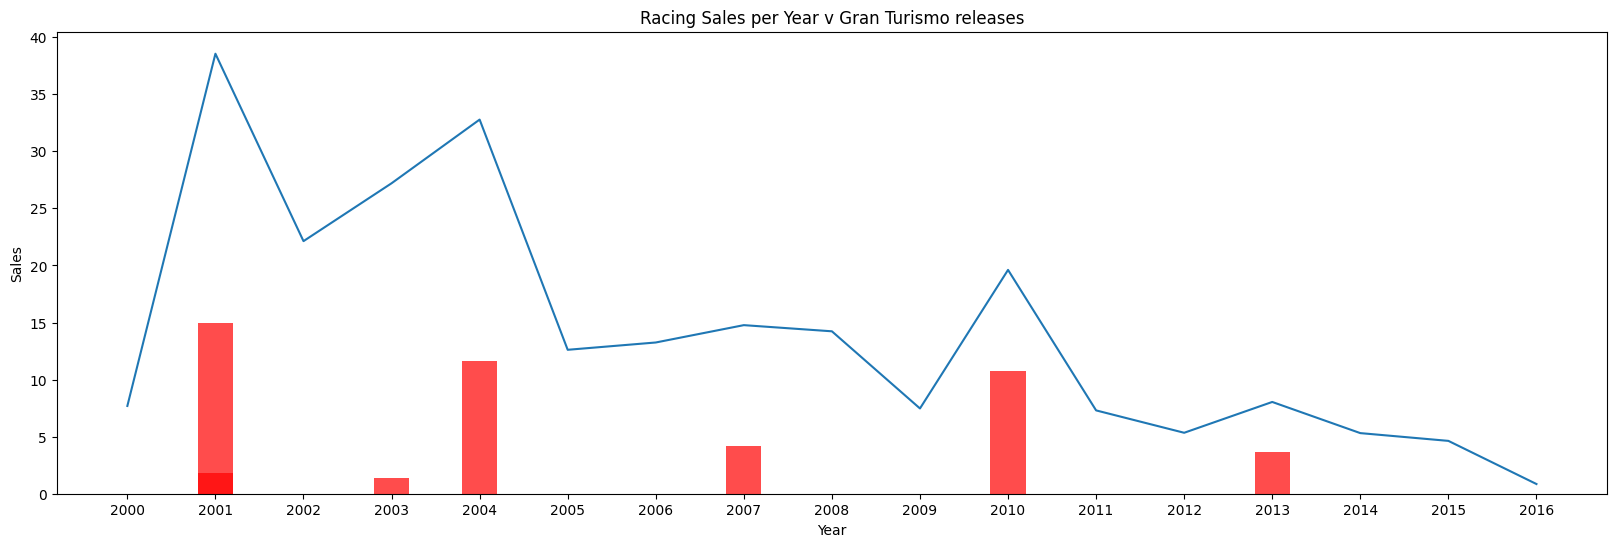

In [35]:
plt.figure(figsize= (20, 6))
sns.lineplot(data= sales_per_year, x= "Year", y="Global_Sales")
bar_width = 0.4
plt.bar(sales_gran_turismo["Year"], sales_gran_turismo["Global_Sales"], color= "red", alpha= 0.7, width= 0.4)

plt.xlabel("Year")
plt.ylabel("Sales")
plt.title("Racing Sales per Year v Gran Turismo releases")
plt.xticks(sales_per_year["Year"])

plt.show()


Conclusiones y recomendaciones:

Las cinco categorías mas fuertes en ventas a nivel mundial son:
    
    -Acción
    -Deportes
    -Shooters (Tiradores)
    -Carreras
    -RPG (Juegos de Rol)


Todos los géneros tienen una franquicia que sobresale en ventas de las demás:
    
    -Acción         --> Grand Theft Auto
    -Deportes       --> Fifa
    -Shooters       --> Call of Duty
    -Carreras       --> Gran Turismo
    -RPG            --> Final Fantasy 

Nos encontramos en segundo lugar en ventas como casa fabricante:

    -Electronic Arts
    -Sony Computer Entertainment
    -Activision




Como empresa, Sony Computer Entertainment debemos enfocarnos en las siguientes franquicias:
    
    - Gran Turismo, el último juego se estrenó en 2010, sin  embargo la franquicia sigue en auge ya que se estrenará una película en un par de semanas. Hay que considerar que lidera el rubro de la categoría de carreras y a pesar de que ha venido en caída, siempre que se libera un juego nuevo de Gran Turismo las ventas aumentan considerablemente.
    - Uncharted, el último juego fue liberado en 2016 y se ha vuelto muy popular debido a la película del año 2022. Se podría experimentar con un model open-world siguiendo los linbeamientos de Grand Theft Auto que es la franquicia más popular en juegos de acción.